In [3]:
#EDA
#1. Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Customers.csv',sep=',')
products = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Products.csv',sep=',')
transactions = pd.read_csv('/content/drive/MyDrive/Data science Assignment Zeotap/Transactions.csv',sep=',')

# Remove BOM characters from column names
customers.columns = customers.columns.str.replace('ï»¿', '')
products.columns = products.columns.str.replace('ï»¿', '')
transactions.columns = transactions.columns.str.replace('ï»¿', '')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets into one DataFrame
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

# Check the structure of the merged dataset
# Check the cleaned data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB
None
  Transacti

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


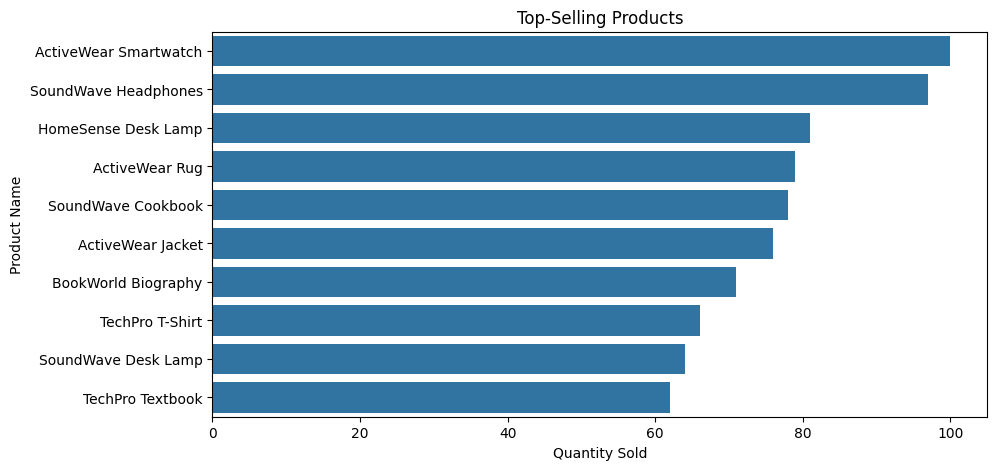

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


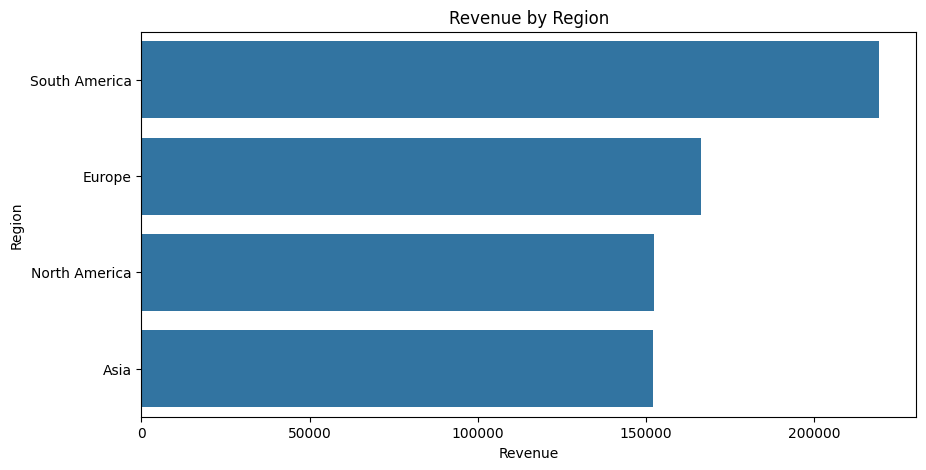

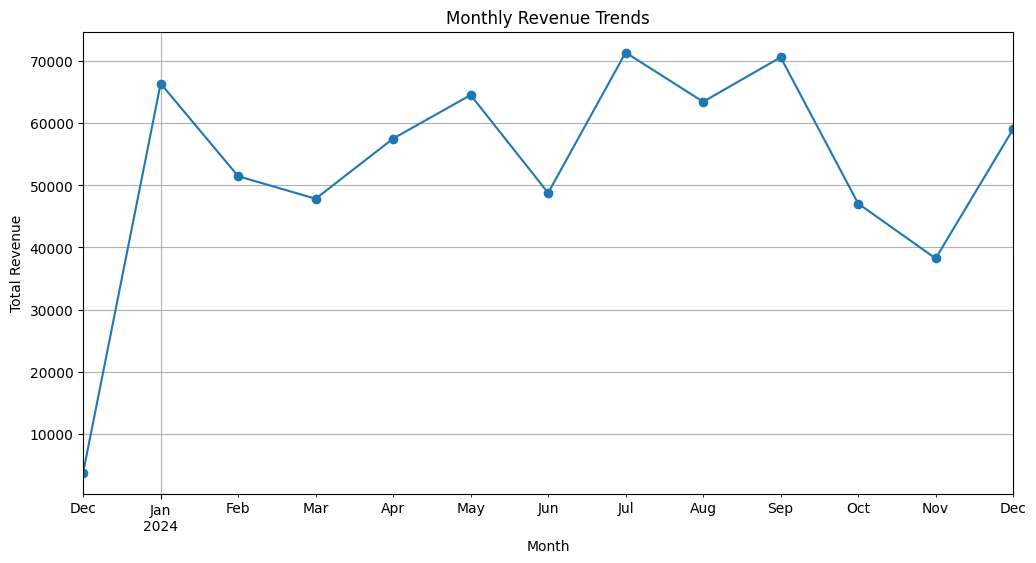

Category
Electronics    288.722008
Clothing       283.104254
Books          280.526222
Home Decor     237.616250
Name: Price, dtype: float64


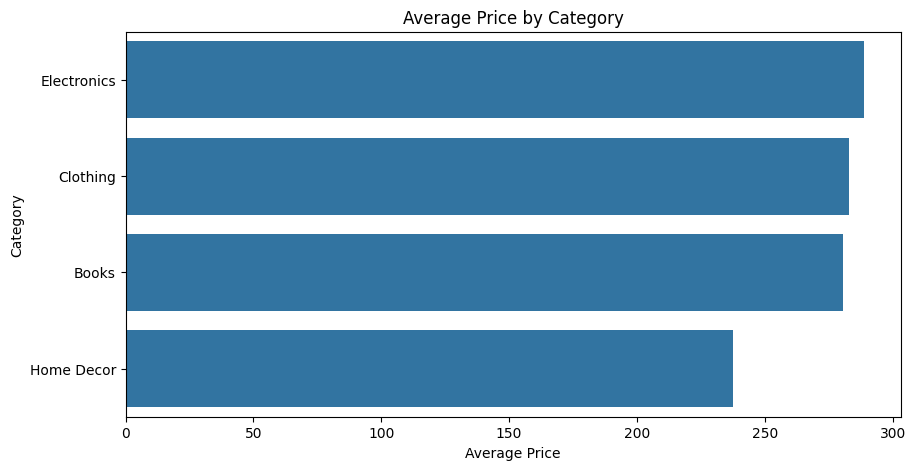

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


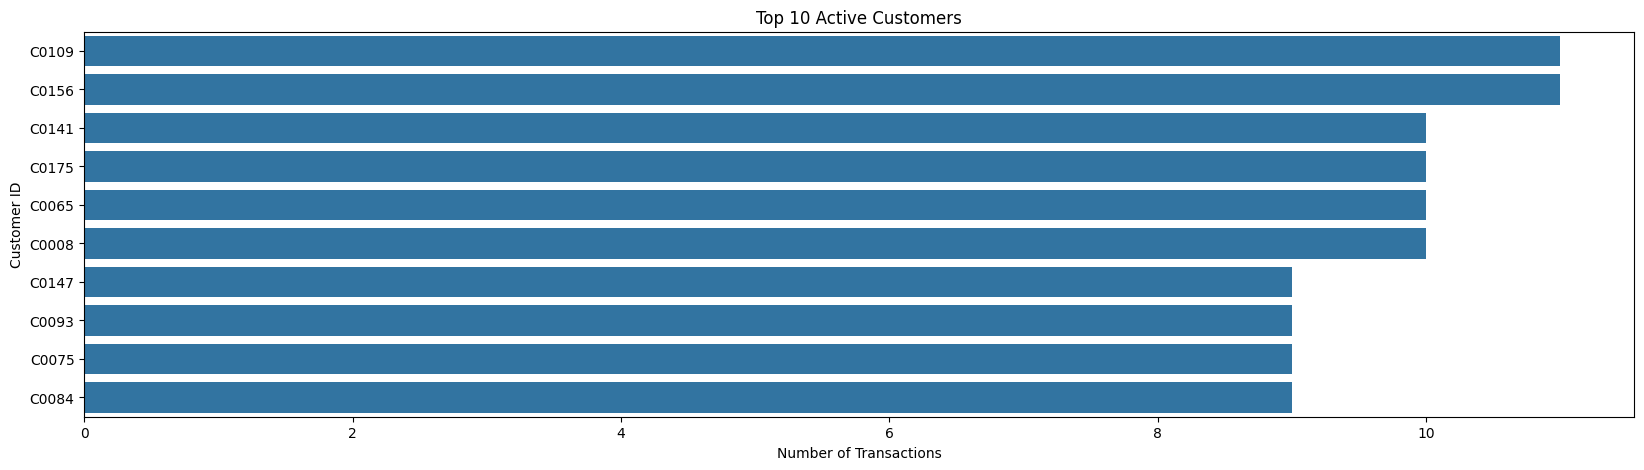

In [6]:
#Analyze Key Metrics
#a. Top-selling products:
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Visualize top-selling products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# b.Revenue by region
revenue_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_region)

# Visualize revenue by region
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index)
plt.title('Revenue by Region')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.show()

# c. Monthly Revenue Trends
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['TotalValue'].sum()

# Visualize monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()


# d. Average Price by Category

# Rename 'Price_y' to 'Price'
data.rename(columns={'Price_y': 'Price'}, inplace=True)

avg_price_by_category = data.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_category)

# Visualize average price by category
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_category.values, y=avg_price_by_category.index)
plt.title("Average Price by Category")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()


#e. Active Customers
active_customers = data['CustomerID'].value_counts().head(10)
print(active_customers)

# Visualize active customers
plt.figure(figsize=(20, 5))
sns.barplot(x=active_customers.values, y=active_customers.index)
plt.title("Top 10 Active Customers")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()


